In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating Drop-Fail-Withdraw rates for each class

In [2]:
student_classes = pd.read_csv('datasets/student_classes.csv')

In [3]:
student_classes.shape

(42483, 11)

In [4]:
student_classes.head()

,EncryptId,Subject,Course,Section,Term,Course_Hours_Attempted,Mid_Term_Grade,Final_Grade,Meeting_Days,Start_Time,End_Time
0,6467132,ACC,343,1,201110,3,NaN,A,MW,1300.0,1415.0
1,6467132,ACC,453,1,201110,3,NaN,A,TR,1400.0,1515.0
2,6467132,ACC,457,1,201110,3,NaN,B,MW,1425.0,1540.0
3,6467132,ACC,465,1,201110,3,NaN,A,TR,1100.0,1215.0
4,6467132,COM,111,13,201110,3,NaN,A,M,1800.0,2030.0


In [5]:
student_classes.isnull().sum()

EncryptId                     0
Subject                       0
Course                        0
Section                       0
Term                          0
Course_Hours_Attempted        0
Mid_Term_Grade            20135
Final_Grade                1311
Meeting_Days               5786
Start_Time                 5856
End_Time                   5856
dtype: int64

From this missing data, we see that out of all of these classes, 20135 students are missing a midterm grade, and 1311 are missing a final grade.

In [6]:
## After doing some investigation, I found that all the classes with missing meeting days and times were online

In [7]:
# filling those missing times with 'Online'
student_classes['Meeting_Days'] = student_classes['Meeting_Days'].fillna('Online')
student_classes['Start_Time'] = student_classes['Start_Time'].fillna('Online')
student_classes['End_Time'] = student_classes['End_Time'].fillna('Online')

Finding average grade in all computer science courses, to find which classes students are struggling with the most

In [8]:
student_classes['Subject'].unique()

array(['ACC', 'COM', 'SPH', 'CSC', 'BIO', 'HMS', 'RHB', 'BCM', 'GBU',
       'SPA', 'MTH', 'GEO', 'GIS', 'GOL', 'HIS', 'ECO', 'MGT', 'MKT',
       'AST', 'KIN', 'SPE', 'MUS', 'NUR', 'FIN', 'BLW', 'ENG', 'MCM',
       'ANS', 'PSC', 'ART', 'PHY', 'CHE', 'MTC', 'HSC', 'CJS', 'SOC',
       'PHI', 'PSY', 'MUP', 'PBA', 'ENV', 'FOR', 'AAS', 'THR', 'EPS',
       'RDG', 'SFA', 'EGR', 'ANT', 'AGM', 'MSC', 'GER', 'ILA', 'FRE',
       'DAN', 'ELE', 'MLG', 'HRT', 'SED', 'ECH', 'STA', 'LAT', 'AGR',
       'MHL', 'MUT', 'SWK', 'REL', 'AGN', 'PLS', 'AEC', 'SUS', 'POR',
       'AGD', 'IRW', 'ICC', 'HSR', 'DHH', 'DRAM', 'ENGL', 'ACCT', 'MATH',
       'MGMT', 'BUSI', 'BCOM', 'CSCI', 'ANTH', 'CRIJ', 'GEOG', 'CSIT',
       'ENGR', 'PHYS', 'BLAW', 'GERM', 'MUSI', 'FINC', 'ENVR', 'HIST',
       'MKTG', 'CHEM', 'GEOL', 'SPCH', 'LING', 'ARTS', 'SEED', 'SPAN',
       'MUEN', 'PSYC', 'MILS', 'ECON', 'GOVT', 'PHIL', 'FORS', 'GISC',
       'MCOM', 'BIOL', 'STAT', 'BAAS', 'COMM', 'ASTR', 'KINE', 'SFAS',
       'NUT

Need to limit this to just computer science courses

In [9]:
# Limiting only to students within computer science department
student_classes = student_classes[(student_classes['Subject'] == 'CSC') | (student_classes['Subject'] == 'CSCI') | (student_classes['Subject'] == 'CSIT') | (student_classes['Subject'] == 'COSC')]

In [10]:
student_classes.reset_index(inplace=True)
student_classes.drop(columns = ['index'],inplace=True)

In [11]:
student_classes.shape

(10326, 11)

In [12]:
student_classes['Subject'].unique()

array(['CSC', 'CSCI', 'CSIT', 'COSC'], dtype=object)

In [13]:
#Reading in the file that contains course conversions for the CSC prefix
course_conversions = pd.read_csv('datasets/Course_Conversions.csv')

In [34]:
course_conversions = course_conversions[course_conversions['Prev. Prefix'] == 'CSC']
new_prefixes = course_conversions['TCCNS Prefix'].unique()
course_conversions['old_combined'] = course_conversions['Prev. Prefix'] + ' ' + course_conversions['Prev. Code'].astype(str)
course_conversions['new_combined'] = course_conversions['TCCNS Prefix'] + ' ' + course_conversions['TCCNS Code'].astype(str)
course_conversions
#print(new_prefixes)
#course_conversions.sort_values('Prev. Code')


,Prev. Prefix,Prev. Code,TCCNS Prefix,TCCNS Code,TCCNS Name,old_combined,new_combined
0,CSC,100,CSIT,1300,Introduction to Problem-Solving,CSC 100,CSIT 1300
1,CSC,101,COSC,1301,Introduction to Computing,CSC 101,COSC 1301
2,CSC,102,CSCI,1302,Computer Science Principles,CSC 102,CSCI 1302
3,CSC,121,BCIS,1305,Introduction to Information Processing Systems,CSC 121,BCIS 1305
4,CSC,301,CSCI,3101,Contemporary Programming Language,CSC 301,CSCI 3101
5,CSC,201,CSIT,2301,Introduction to Information Technology,CSC 201,CSIT 2301
6,CSC,202,CSCI,2302,Computer Programming Principles,CSC 202,CSCI 2302
7,CSC,211,CSCI,2311,Event-Driven Programming,CSC 211,CSCI 2311
8,CSC,214,CSCI,2314,Computer Organization and Architecture,CSC 214,CSCI 2314
9,CSC,241,CSCI,2341,Data Structures,CSC 241,CSCI 2341


In [15]:
student_classes['Combined'] = student_classes['Subject'] + ' ' + student_classes['Course'].astype(str)
student_classes.head()

,EncryptId,Subject,Course,Section,Term,Course_Hours_Attempted,Mid_Term_Grade,Final_Grade,Meeting_Days,Start_Time,End_Time,Combined
0,4124661,CSC,241,1,201110,3,NaN,C,MWF,1000.0,1050.0,CSC 241
1,4124661,CSC,331,1,201110,3,NaN,C,TR,930.0,1045.0,CSC 331
2,4124661,CSC,343,1,201110,3,NaN,F,TR,1100.0,1215.0,CSC 343
3,185083,CSC,102,1,201110,3,NaN,W6,MWF,800.0,850.0,CSC 102
4,23547594,CSC,342,1,201110,3,NaN,B,MWF,1000.0,1050.0,CSC 342


In [16]:
student_classes.Subject.value_counts()

CSC     9250
CSCI     795
CSIT     276
COSC       5
Name: Subject, dtype: int64

In [17]:
student_classes['Course'] = student_classes['Course'].astype(int)

In [32]:
temp = pd.DataFrame(columns = student_classes.columns)
for index, row in course_conversions.iterrows():
    student_classes.loc[
            (student_classes['Combined'] == row['old_combined']),
            'Combined'] = row['new_combined']
   
    
    

In [35]:
# Combined field is updated, split on this by ' ' to update Subject and Course
student_classes[student_classes['Subject']=='CSC']

,EncryptId,Subject,Course,Section,Term,Course_Hours_Attempted,Mid_Term_Grade,Final_Grade,Meeting_Days,Start_Time,End_Time,Combined
0,4124661,CSC,241,1,201110,3,NaN,C,MWF,1000.0,1050.0,CSCI 2341
1,4124661,CSC,331,1,201110,3,NaN,C,TR,930.0,1045.0,CSCI 3331
2,4124661,CSC,343,1,201110,3,NaN,F,TR,1100.0,1215.0,CSC 343
3,185083,CSC,102,1,201110,3,NaN,W6,MWF,800.0,850.0,CSCI 1302
4,23547594,CSC,342,1,201110,3,NaN,B,MWF,1000.0,1050.0,CSCI 3342
...,...,...,...,...,...,...,...,...,...,...,...,...
9245,19760588,CSC,202,916,202040,3,NaN,B,Online,Online,Online,CSCI 2302
9246,19760588,CSC,211,916,202040,3,NaN,B,Online,Online,Online,CSCI 2311
9247,2610430,CSC,201,916,202040,3,NaN,D,Online,Online,Online,CSIT 2301
9248,25789907,CSC,202,916,202040,3,NaN,C,Online,Online,Online,CSCI 2302


In [40]:
student_classes['Subject'] = student_classes['Combined'].apply(lambda x: x.split(' ')[0])

In [41]:
student_classes['Course'] = student_classes['Combined'].apply(lambda x: x.split(' ')[1])

In [44]:
student_classes.drop('Combined',axis=1,inplace=True)
student_classes

,EncryptId,Subject,Course,Section,Term,Course_Hours_Attempted,Mid_Term_Grade,Final_Grade,Meeting_Days,Start_Time,End_Time
0,4124661,CSCI,2341,1,201110,3,NaN,C,MWF,1000.0,1050.0
1,4124661,CSCI,3331,1,201110,3,NaN,C,TR,930.0,1045.0
2,4124661,CSC,343,1,201110,3,NaN,F,TR,1100.0,1215.0
3,185083,CSCI,1302,1,201110,3,NaN,W6,MWF,800.0,850.0
4,23547594,CSCI,3342,1,201110,3,NaN,B,MWF,1000.0,1050.0
...,...,...,...,...,...,...,...,...,...,...,...
10321,25964076,CSCI,1302,1,202130,3,B,B,MTWR,1200.0,1340.0
10322,25964076,CSCI,2302,1,202130,3,A,B,MTWR,1000.0,1140.0
10323,25964076,CSCI,2311,1,202130,3,NaN,W6,MTWR,1200.0,1340.0
10324,5874241,CSCI,1302,1,202130,3,C,C,MTWR,1200.0,1340.0


In [47]:
# Classes that still have 3 digit code and subject, are classes that aren't offered anymore so we can just drop these rows
student_classes = student_classes[student_classes['Subject'] != 'CSC']
student_classes.head()

,EncryptId,Subject,Course,Section,Term,Course_Hours_Attempted,Mid_Term_Grade,Final_Grade,Meeting_Days,Start_Time,End_Time
0,4124661,CSCI,2341,1,201110,3,NaN,C,MWF,1000.0,1050.0
1,4124661,CSCI,3331,1,201110,3,NaN,C,TR,930.0,1045.0
3,185083,CSCI,1302,1,201110,3,NaN,W6,MWF,800.0,850.0
4,23547594,CSCI,3342,1,201110,3,NaN,B,MWF,1000.0,1050.0
5,23547594,CSCI,4325,1,201110,3,NaN,B,TR,800.0,915.0


In [48]:
student_classes['Final_Grade'].unique()

array(['C', 'W6', 'B', 'F', 'A', 'D', 'QF', 'W', nan, 'WP', 'P', 'WF'],
      dtype=object)

In [49]:
student_classes['Mid_Term_Grade'].unique()

array([nan, 'B', 'A', 'F', 'C', 'D', 'QF', 'WH', '84', 'P'], dtype=object)

In [50]:
student_classes[student_classes['Mid_Term_Grade'] == 'WH']
## Two students have WH which is 'Incomplete', however they do have 
## final grades which means they did finish the class

,EncryptId,Subject,Course,Section,Term,Course_Hours_Attempted,Mid_Term_Grade,Final_Grade,Meeting_Days,Start_Time,End_Time
2336,4446362,CSCI,1302,2,201410,3,WH,A,MWF,1000.0,1050.0
9912,29728420,CSIT,3350,500,202120,3,WH,B,Online,Online,Online


In [51]:
student_classes[student_classes['Mid_Term_Grade'] == 'QF']
## All but one student with a Quit Fail for a midterm grade didn't finish
## the class. That one student ended with an F so it is caught in the 
## failed class dataframe below

,EncryptId,Subject,Course,Section,Term,Course_Hours_Attempted,Mid_Term_Grade,Final_Grade,Meeting_Days,Start_Time,End_Time
1311,1420537,CSCI,1302,2,201310,3,QF,QF,MWF,1000.0,1050.0
1641,21027511,CSCI,2314,1,201320,3,QF,W6,TR,1100.0,1215.0
1642,21027511,CSCI,2341,1,201320,3,QF,W6,TR,1400.0,1515.0
1662,3496789,CSIT,3350,500,201320,3,QF,W6,Online,Online,Online
1731,16912036,CSIT,3350,500,201320,3,QF,QF,Online,Online,Online
1821,15699189,CSIT,3340,500,201320,3,QF,QF,Online,Online,Online
1822,15699189,CSIT,3350,500,201320,3,QF,QF,Online,Online,Online
2126,18117000,CSIT,3340,500,201410,3,QF,W,Online,Online,Online
2193,7661973,CSIT,3340,1,201410,3,QF,W6,TR,930.0,1045.0
2412,23714866,CSCI,1302,2,201410,3,QF,QF,MWF,1000.0,1050.0


In [52]:
student_classes.isnull().sum()

EncryptId                    0
Subject                      0
Course                       0
Section                      0
Term                         0
Course_Hours_Attempted       0
Mid_Term_Grade            4846
Final_Grade                 28
Meeting_Days                 0
Start_Time                   0
End_Time                     0
dtype: int64

4904 students dont have a midterm grade. 28 are missing a final grade after limiting to just Computer science courses

In [53]:
# creating dataframe that contains all of the courses that were dropped in any way to get percentage withdrew
withdrew_student_classes = student_classes[(student_classes['Final_Grade'] == 'W6') | (student_classes['Final_Grade'] == 'W') | (student_classes['Final_Grade'] == 'WP') | (student_classes['Final_Grade'] == 'WF') | (student_classes['Final_Grade'] == 'QF')]
# W6 is dropped, no grade counts for 6 drop
# W is dropped or withdrew: No Grade
# WP is Withdrew Passing
# WF is Withdrew Failing
# QF is Quit Failing (stopped going to class but didn't officially drop)
withdrew_student_classes.shape

(903, 11)

In [54]:
withdrew_student_classes.reset_index(inplace=True)
withdrew_student_classes.drop(columns = ['index'],inplace=True)
withdrew_student_classes.head()

C:\Users\logan\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,EncryptId,Subject,Course,Section,Term,Course_Hours_Attempted,Mid_Term_Grade,Final_Grade,Meeting_Days,Start_Time,End_Time
0,185083,CSCI,1302,1,201110,3,NaN,W6,MWF,800.0,850.0
1,27317938,CSIT,3340,1,201110,3,NaN,QF,MWF,1000.0,1050.0
2,2905001,CSIT,3351,1,201110,3,NaN,QF,MWF,800.0,850.0
3,18455061,CSCI,2341,1,201110,3,NaN,QF,MWF,1000.0,1050.0
4,1673719,CSIT,3353,1,201110,3,NaN,QF,TR,1100.0,1215.0


In [55]:
withdrew_student_classes.shape

(903, 11)

903 students in someway didn't complete a class

In [56]:
# creating a dataframe for every class that ended in a failing grade, or a D
failed_student_classes = student_classes[(student_classes['Final_Grade'] == 'F') | (student_classes['Final_Grade'] == 'D')]
failed_student_classes.shape

(1689, 11)

In [57]:
failed_student_classes.reset_index(inplace=True)
failed_student_classes.drop(columns = ['index'],inplace=True)
failed_student_classes.head()

C:\Users\logan\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,EncryptId,Subject,Course,Section,Term,Course_Hours_Attempted,Mid_Term_Grade,Final_Grade,Meeting_Days,Start_Time,End_Time
0,19539773,CSCI,2314,1,201110,3,NaN,F,MWF,900.0,950.0
1,19539773,CSCI,2341,1,201110,3,NaN,F,MWF,1000.0,1050.0
2,8867568,CSCI,2341,1,201110,3,NaN,F,MWF,1000.0,1050.0
3,8867568,CSCI,3331,1,201110,3,NaN,F,TR,930.0,1045.0
4,12079967,CSCI,4325,1,201110,3,NaN,D,TR,800.0,915.0


In [58]:
failed_student_classes.shape

(1689, 11)

1689 students failed a class with a D or F

 ________________________________________

Count how many students in each individual classes dropped out

In [59]:
# getting individual courses
courses = student_classes[['Subject','Course']]
courses.head()

,Subject,Course
0,CSCI,2341
1,CSCI,3331
3,CSCI,1302
4,CSCI,3342
5,CSCI,4325


In [60]:
courses.shape

(10268, 2)

In [61]:
courses.duplicated().sum()

10232

In [62]:
courses.drop_duplicates(inplace=True)

C:\Users\logan\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [63]:
## Just has the different computer science classes taken
courses.shape

(36, 2)

In [64]:
courses.reset_index(inplace=True)
courses.drop(columns = ['index'],inplace=True)
courses['Subject'].unique()

C:\Users\logan\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


array(['CSCI', 'COSC', 'BCIS', 'CSIT'], dtype=object)

In [65]:
courses['Percentage Withdrew'] = ""
courses['Percentage Fail'] = ""
courses.head()

C:\Users\logan\AppData\Local\Temp/ipykernel_23464/1028395745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  courses['Percentage Withdrew'] = ""
C:\Users\logan\AppData\Local\Temp/ipykernel_23464/1028395745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  courses['Percentage Fail'] = ""


,Subject,Course,Percentage Withdrew,Percentage Fail
0,CSCI,2341,,
1,CSCI,3331,,
2,CSCI,1302,,
3,CSCI,3342,,
4,CSCI,4325,,


In [66]:
## Finding percentage of each course students didn't finish the course
for row in range(len(courses)):
    Subject = courses['Subject'].iloc[[row]].values[0]
    Course = courses['Course'].iloc[[row]].values[0]
    tempWithdrew = withdrew_student_classes[(withdrew_student_classes['Subject'] == Subject) & (withdrew_student_classes['Course'] == Course)]
    tempClasses = student_classes[(student_classes['Subject'] == Subject) & (student_classes['Course'] == Course)]
    courses['Percentage Withdrew'].iloc[[row]] = "{0:.4f}".format(len(tempWithdrew)/len(tempClasses))


C:\Users\logan\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [67]:
courses.head()

,Subject,Course,Percentage Withdrew,Percentage Fail
0,CSCI,2341,0.2196,
1,CSCI,3331,0.0677,
2,CSCI,1302,0.1184,
3,CSCI,3342,0.0704,
4,CSCI,4325,0.0359,


In [68]:
# Finding percentage of students who didn't withdraw from classes, but still failed
for row in range(len(courses)):
    Subject = courses['Subject'].iloc[[row]].values[0]
    Course = courses['Course'].iloc[[row]].values[0]
    tempFailed = failed_student_classes[(failed_student_classes['Subject'] == Subject) & (failed_student_classes['Course'] == Course)]
    tempClasses = student_classes[(student_classes['Subject'] == Subject) & (student_classes['Course'] == Course)]
    courses['Percentage Fail'].iloc[[row]] = "{0:.4f}".format(len(tempFailed)/len(tempClasses))

C:\Users\logan\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [69]:
courses.head()

,Subject,Course,Percentage Withdrew,Percentage Fail
0,CSCI,2341,0.2196,0.2792
1,CSCI,3331,0.0677,0.1355
2,CSCI,1302,0.1184,0.2449
3,CSCI,3342,0.0704,0.1925
4,CSCI,4325,0.0359,0.0838


In [70]:
#storing these columns as float values for graphing
courses['Percentage Withdrew'] = courses['Percentage Withdrew'].astype(float)
courses['Percentage Fail'] = courses['Percentage Fail'].astype(float)
courses.dtypes

C:\Users\logan\AppData\Local\Temp/ipykernel_23464/3319596142.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  courses['Percentage Withdrew'] = courses['Percentage Withdrew'].astype(float)
C:\Users\logan\AppData\Local\Temp/ipykernel_23464/3319596142.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  courses['Percentage Fail'] = courses['Percentage Fail'].astype(float)


Subject                 object
Course                  object
Percentage Withdrew    float64
Percentage Fail        float64
dtype: object

In [73]:
# making this column for x axis of graph
courses['Subject and Course'] = courses['Subject'] + " " + courses['Course'].astype(str)
courses.head()

C:\Users\logan\AppData\Local\Temp/ipykernel_23464/3588501860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  courses['Subject and Course'] = courses['Subject'] + " " + courses['Course'].astype(str)


,Subject,Course,Percentage Withdrew,Percentage Fail,Subject and Course
0,CSCI,2341,0.2196,0.2792,CSCI 2341
1,CSCI,3331,0.0677,0.1355,CSCI 3331
2,CSCI,1302,0.1184,0.2449,CSCI 1302
3,CSCI,3342,0.0704,0.1925,CSCI 3342
4,CSCI,4325,0.0359,0.0838,CSCI 4325


In [74]:
courses.dtypes

Subject                 object
Course                  object
Percentage Withdrew    float64
Percentage Fail        float64
Subject and Course      object
dtype: object

In [75]:
courses.shape

(36, 5)

In [76]:
#Showing the lowest 10 for each withdrew and fail percentages

#I combine these later for DFW rates that is the important part of all this was just curious if they were
#correlated
display(courses.nlargest(n=10,columns='Percentage Withdrew'))
display(courses.nlargest(n=10,columns='Percentage Fail'))

,Subject,Course,Percentage Withdrew,Percentage Fail,Subject and Course
0,CSCI,2341,0.2196,0.2792,CSCI 2341
14,CSCI,2302,0.1743,0.2096,CSCI 2302
6,CSCI,2314,0.1674,0.2190,CSCI 2314
33,CSCI,3302,0.1404,0.1667,CSCI 3302
2,CSCI,1302,0.1184,0.2449,CSCI 1302
28,CSIT,2301,0.1151,0.2590,CSIT 2301
15,CSCI,2311,0.1058,0.2293,CSCI 2311
19,CSCI,3321,0.0957,0.1485,CSCI 3321
17,CSCI,3333,0.0830,0.1784,CSCI 3333
13,CSIT,3340,0.0718,0.1526,CSIT 3340


,Subject,Course,Percentage Withdrew,Percentage Fail,Subject and Course
0,CSCI,2341,0.2196,0.2792,CSCI 2341
28,CSIT,2301,0.1151,0.2590,CSIT 2301
2,CSCI,1302,0.1184,0.2449,CSCI 1302
15,CSCI,2311,0.1058,0.2293,CSCI 2311
6,CSCI,2314,0.1674,0.2190,CSCI 2314
12,CSIT,3353,0.0487,0.2110,CSIT 3353
14,CSCI,2302,0.1743,0.2096,CSCI 2302
20,CSIT,3355,0.0099,0.2030,CSIT 3355
3,CSCI,3342,0.0704,0.1925,CSCI 3342
17,CSCI,3333,0.0830,0.1784,CSCI 3333


In [77]:
# they are highly correlated as you would expect
courses.corr()

,Percentage Withdrew,Percentage Fail
Percentage Withdrew,1.000000,0.795323
Percentage Fail,0.795323,1.000000


In [78]:
courses[courses['Percentage Withdrew'] > .1]

,Subject,Course,Percentage Withdrew,Percentage Fail,Subject and Course
0,CSCI,2341,0.2196,0.2792,CSCI 2341
2,CSCI,1302,0.1184,0.2449,CSCI 1302
6,CSCI,2314,0.1674,0.2190,CSCI 2314
14,CSCI,2302,0.1743,0.2096,CSCI 2302
15,CSCI,2311,0.1058,0.2293,CSCI 2311
28,CSIT,2301,0.1151,0.2590,CSIT 2301
33,CSCI,3302,0.1404,0.1667,CSCI 3302


In [79]:
courses[courses['Percentage Fail'] > .2]

,Subject,Course,Percentage Withdrew,Percentage Fail,Subject and Course
0,CSCI,2341,0.2196,0.2792,CSCI 2341
2,CSCI,1302,0.1184,0.2449,CSCI 1302
6,CSCI,2314,0.1674,0.2190,CSCI 2314
12,CSIT,3353,0.0487,0.2110,CSIT 3353
14,CSCI,2302,0.1743,0.2096,CSCI 2302
15,CSCI,2311,0.1058,0.2293,CSCI 2311
20,CSIT,3355,0.0099,0.2030,CSIT 3355
28,CSIT,2301,0.1151,0.2590,CSIT 2301


Text(0.5, 1.0, 'Percentage Withdrew')

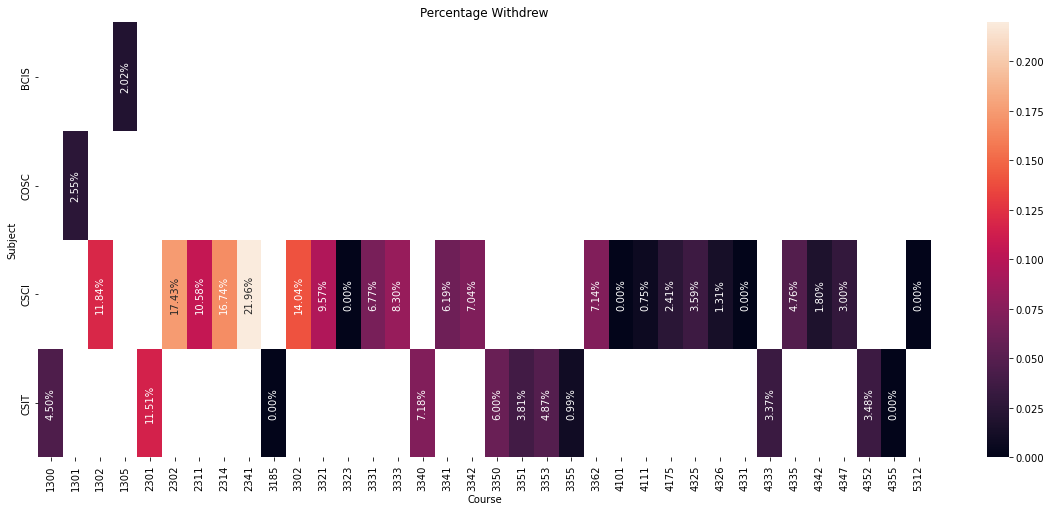

In [81]:
#heat map for percentage withdrew and each course, lighter color courses are the ones with the highest
#same as the above table, just in graphical form for visualization purposes
plt.figure(figsize=(20,8))
sns.heatmap(courses.pivot("Subject",'Course','Percentage Withdrew'),annot=True,fmt='.2%',annot_kws={'rotation': 90})
plt.title('Percentage Withdrew')

## CSCI 2341 has a very high withdrawal percentage - 21.96%
### CSCI 2302 and 2314 follow closely - 17.43% and 16.74% respectively

Text(0.5, 1.0, 'Percentage Withdrew')

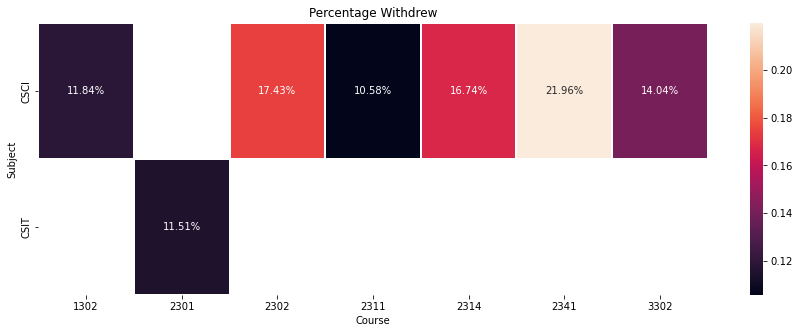

In [82]:
# same graph, just less noisy, focusing on classes with the highest withdraw rates
plt.figure(figsize=(15,5))
sns.heatmap(courses[courses['Percentage Withdrew'] > .1].pivot("Subject",'Course','Percentage Withdrew'),annot=True,linewidths=2,linecolor='white',fmt='.2%')
plt.title('Percentage Withdrew')

### Classes that have a withdrawal percentage higher than 10%

Text(0.5, 1.0, 'Fail Percentage')

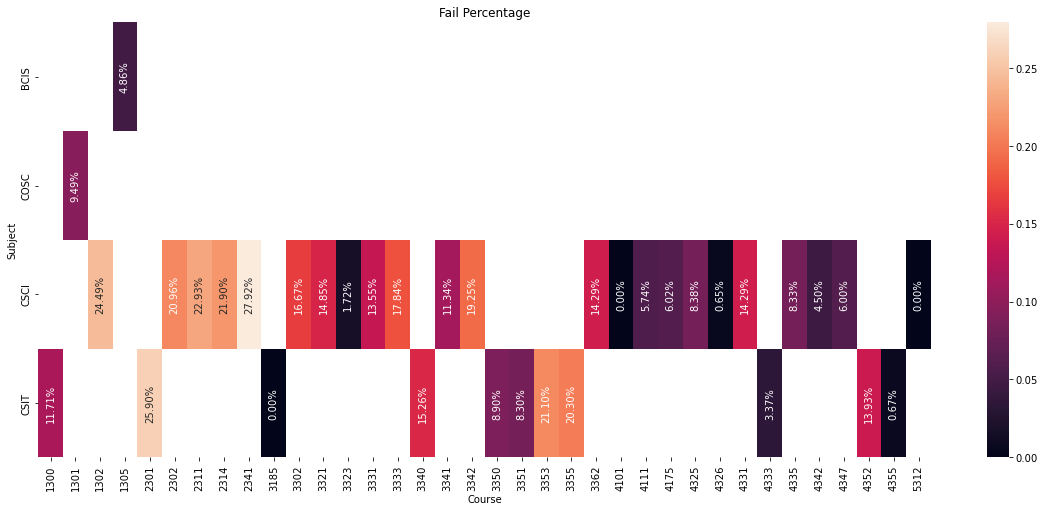

In [83]:
#same idea as above, but with fail percentages
plt.figure(figsize=(20,8))
sns.heatmap(courses.pivot("Subject",'Course','Percentage Fail'),annot=True,fmt='.2%',annot_kws={'rotation': 90})
plt.title('Fail Percentage')

## This graph has a lot more high values, at least most students are trying to perservere through class

Text(0.5, 1.0, 'Courses with Fail Rate > 20%')

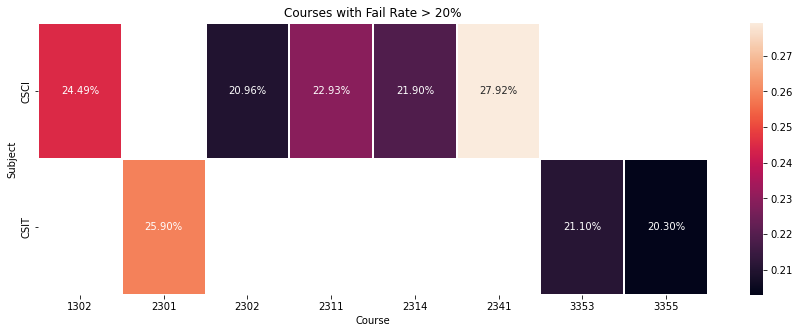

In [85]:
plt.figure(figsize=(15,5))
ax = sns.heatmap(courses[courses['Percentage Fail'] > .2].pivot("Subject",'Course','Percentage Fail'),annot=True,fmt='.2%',linewidths=2,linecolor='white')
ax.set_title("Courses with Fail Rate > 20%")

In [86]:
#this is the important variable of this, the combination of those percentages gives up the DFW Rate (D-Fail-Withdraw)
courses['DFW Rates'] = courses['Percentage Withdrew'] + courses['Percentage Fail']
courses.head()

C:\Users\logan\AppData\Local\Temp/ipykernel_23464/801627493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  courses['DFW Rates'] = courses['Percentage Withdrew'] + courses['Percentage Fail']


,Subject,Course,Percentage Withdrew,Percentage Fail,Subject and Course,DFW Rates
0,CSCI,2341,0.2196,0.2792,CSCI 2341,0.4988
1,CSCI,3331,0.0677,0.1355,CSCI 3331,0.2032
2,CSCI,1302,0.1184,0.2449,CSCI 1302,0.3633
3,CSCI,3342,0.0704,0.1925,CSCI 3342,0.2629
4,CSCI,4325,0.0359,0.0838,CSCI 4325,0.1197


Text(0.5, 1.0, 'D-Fail-Withdrawal Rate')

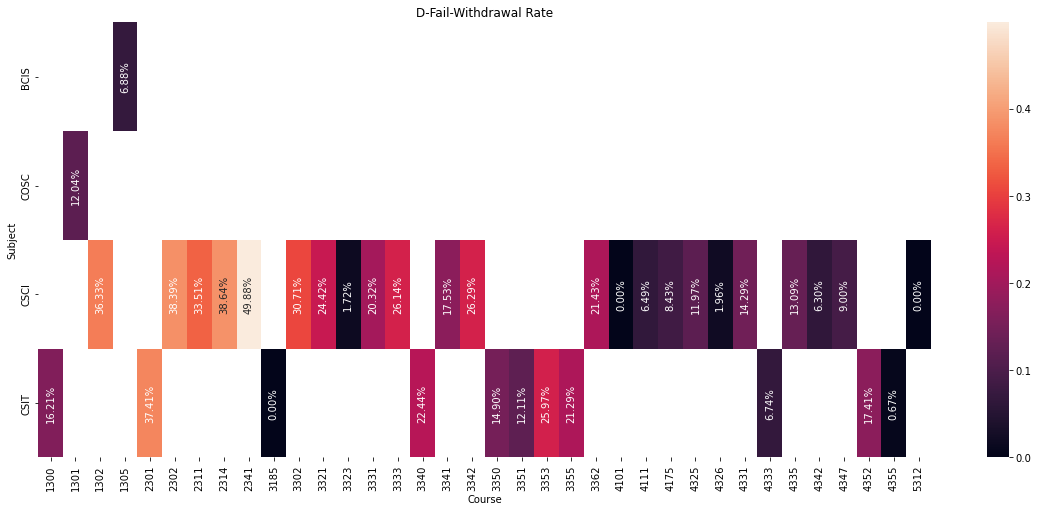

In [89]:
# Same graph as before but with DFW Rates
plt.figure(figsize=(20,8))
ax = sns.heatmap(courses.pivot("Subject",'Course','DFW Rates'),annot=True,fmt='.2%',annot_kws={'rotation': 90})
ax.set_title('D-Fail-Withdrawal Rate')

Text(0.5, 1.0, 'D-Fail-Withdrawal Rate > 30%')

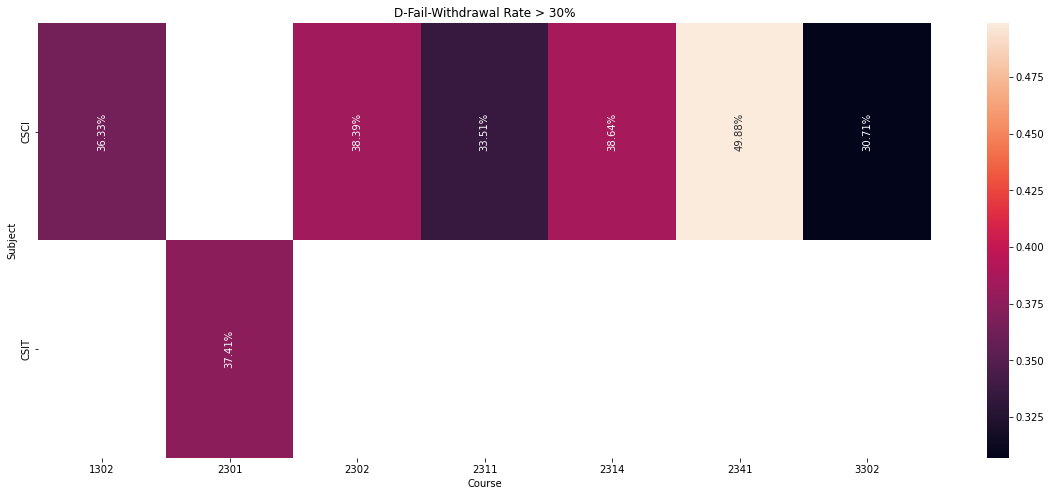

In [90]:
# limiting it to the top classes with a DFW rate of greater than 30%
plt.figure(figsize=(20,8))
ax = sns.heatmap(courses[courses['DFW Rates'] > .3].pivot("Subject",'Course','DFW Rates'),annot=True,fmt='.2%',annot_kws={'rotation': 90})
ax.set_title('D-Fail-Withdrawal Rate > 30%')

## CSCI 2341 has a DFW rate of almost 50% definitely a class that needs help
### All of these classes are definitely classes that need help, but that one is about 10% higher than the others

In [91]:
#saved this to use for later persistence exploration
courses.to_csv('DFW_Rates.csv')

# Doing the same comparisons, but with different class times to see which times are overall better for student performance.

In [92]:
class_times = student_classes[['Start_Time','End_Time']]
class_times.head()

,Start_Time,End_Time
0,1000.0,1050.0
1,930.0,1045.0
3,800.0,850.0
4,1000.0,1050.0
5,800.0,915.0


In [93]:
class_times.shape

(10268, 2)

In [94]:
# gets the uniques time slots
class_times.drop_duplicates(inplace=True)
class_times.shape

C:\Users\logan\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(22, 2)

In [95]:
class_times.reset_index(inplace=True)
class_times.drop(columns = ['index'],inplace=True)
class_times.head()

C:\Users\logan\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Start_Time,End_Time
0,1000.0,1050.0
1,930.0,1045.0
2,800.0,850.0
3,800.0,915.0
4,1530.0,1645.0


In [96]:
class_times['Percent Withdrew'] = ""
class_times['Percent Failed'] = ""
class_times['DFW Rates'] = ""
class_times['Start_Time'].unique()

C:\Users\logan\AppData\Local\Temp/ipykernel_23464/1409833061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_times['Percent Withdrew'] = ""
C:\Users\logan\AppData\Local\Temp/ipykernel_23464/1409833061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_times['Percent Failed'] = ""
C:\Users\logan\AppData\Local\Temp/ipykernel_23464/1409833061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

array([1000.0, 930.0, 800.0, 1530.0, 900.0, 1230.0, 1400.0, 1100.0,
       1430.0, 1600.0, 1615.0, 'Online', 1015.0, 1445.0, 1300.0, 1500.0,
       1200.0], dtype=object)

In [102]:
# again combining these for visualization purposes
class_times['Combined Times'] = class_times['Start_Time'].astype(str) + "-" + class_times['End_Time'].astype(str)
class_times

C:\Users\logan\AppData\Local\Temp/ipykernel_23464/140235356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_times['Combined Times'] = class_times['Start_Time'].astype(str) + "-" + class_times['End_Time'].astype(str)


,Start_Time,End_Time,Percent Withdrew,Percent Failed,DFW Rates,Combined Times
0,1000.0,1050.0,0.0793,0.1411,,1000.0-1050.0
1,930.0,1045.0,0.0932,0.2060,,930.0-1045.0
2,800.0,850.0,0.1014,0.2319,,800.0-850.0
3,800.0,915.0,0.0774,0.2024,,800.0-915.0
4,1530.0,1645.0,0.0215,0.0708,,1530.0-1645.0
5,900.0,950.0,0.0926,0.2047,,900.0-950.0
6,1230.0,1345.0,0.0820,0.1772,,1230.0-1345.0
7,1400.0,1515.0,0.0957,0.1619,,1400.0-1515.0
8,1100.0,1150.0,0.1067,0.1601,,1100.0-1150.0
9,1100.0,1215.0,0.1184,0.1688,,1100.0-1215.0


In [103]:
#finding which times students tended to fail more often.
for row in range(len(class_times)):
    Start = class_times['Start_Time'].iloc[[row]].values[0]
    End = class_times['End_Time'].iloc[[row]].values[0]
    tempFailed = failed_student_classes[(failed_student_classes['Start_Time'] == Start) & (failed_student_classes['End_Time'] == End)]
    tempClasses = student_classes[(student_classes['Start_Time'] == Start) & (student_classes['End_Time'] == End)]
    class_times['Percent Failed'].iloc[[row]] = "{0:.4f}".format(len(tempFailed)/len(tempClasses))

C:\Users\logan\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\logan\anaconda3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()


In [104]:
class_times.head()

,Start_Time,End_Time,Percent Withdrew,Percent Failed,DFW Rates,Combined Times
0,1000.0,1050.0,0.0793,0.1411,,1000.0-1050.0
1,930.0,1045.0,0.0932,0.2060,,930.0-1045.0
2,800.0,850.0,0.1014,0.2319,,800.0-850.0
3,800.0,915.0,0.0774,0.2024,,800.0-915.0
4,1530.0,1645.0,0.0215,0.0708,,1530.0-1645.0


In [105]:
#finding which times students tended to withdraw from more often.
for row in range(len(class_times)):
    Start = class_times['Start_Time'].iloc[[row]].values[0]
    End = class_times['End_Time'].iloc[[row]].values[0]
    tempWithdrew = withdrew_student_classes[(withdrew_student_classes['Start_Time'] == Start) & (withdrew_student_classes['End_Time'] == End)]
    tempClasses = student_classes[(student_classes['Start_Time'] == Start) & (student_classes['End_Time'] == End)]
    class_times['Percent Withdrew'].iloc[[row]] = "{0:.4f}".format(len(tempWithdrew)/len(tempClasses))

C:\Users\logan\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\logan\anaconda3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()


In [106]:
class_times['Percent Withdrew'] = class_times['Percent Withdrew'].astype(float)
class_times['Percent Failed'] = class_times['Percent Failed'].astype(float)

C:\Users\logan\AppData\Local\Temp/ipykernel_23464/3261763903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_times['Percent Withdrew'] = class_times['Percent Withdrew'].astype(float)
C:\Users\logan\AppData\Local\Temp/ipykernel_23464/3261763903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_times['Percent Failed'] = class_times['Percent Failed'].astype(float)


In [107]:
class_times['DFW Rates'] = class_times['Percent Withdrew'] + class_times['Percent Failed']
class_times

C:\Users\logan\AppData\Local\Temp/ipykernel_23464/2007920462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_times['DFW Rates'] = class_times['Percent Withdrew'] + class_times['Percent Failed']


,Start_Time,End_Time,Percent Withdrew,Percent Failed,DFW Rates,Combined Times
0,1000.0,1050.0,0.0793,0.1411,0.2204,1000.0-1050.0
1,930.0,1045.0,0.0932,0.2060,0.2992,930.0-1045.0
2,800.0,850.0,0.1014,0.2319,0.3333,800.0-850.0
3,800.0,915.0,0.0774,0.2024,0.2798,800.0-915.0
4,1530.0,1645.0,0.0215,0.0708,0.0923,1530.0-1645.0
5,900.0,950.0,0.0926,0.2047,0.2973,900.0-950.0
6,1230.0,1345.0,0.0820,0.1772,0.2592,1230.0-1345.0
7,1400.0,1515.0,0.0957,0.1619,0.2576,1400.0-1515.0
8,1100.0,1150.0,0.1067,0.1601,0.2668,1100.0-1150.0
9,1100.0,1215.0,0.1184,0.1688,0.2872,1100.0-1215.0


In [108]:
# these values are skewed because a lot of these time slots have very little data
# I later go time slot by certain class which is much more explanatory and useful

# shows lowest 10 for both withdrew and fail percentages
display(class_times.nlargest(n=10,columns='Percent Withdrew'))
display(class_times.nlargest(n=10,columns='Percent Failed'))

,Start_Time,End_Time,Percent Withdrew,Percent Failed,DFW Rates,Combined Times
19,1500.0,1730.0,0.3333,0.3077,0.6410,1500.0-1730.0
20,1200.0,1340.0,0.1935,0.1290,0.3225,1200.0-1340.0
9,1100.0,1215.0,0.1184,0.1688,0.2872,1100.0-1215.0
8,1100.0,1150.0,0.1067,0.1601,0.2668,1100.0-1150.0
14,1015.0,1210.0,0.1058,0.1481,0.2539,1015.0-1210.0
2,800.0,850.0,0.1014,0.2319,0.3333,800.0-850.0
7,1400.0,1515.0,0.0957,0.1619,0.2576,1400.0-1515.0
1,930.0,1045.0,0.0932,0.2060,0.2992,930.0-1045.0
5,900.0,950.0,0.0926,0.2047,0.2973,900.0-950.0
18,1300.0,1415.0,0.0879,0.1621,0.2500,1300.0-1415.0


,Start_Time,End_Time,Percent Withdrew,Percent Failed,DFW Rates,Combined Times
19,1500.0,1730.0,0.3333,0.3077,0.6410,1500.0-1730.0
2,800.0,850.0,0.1014,0.2319,0.3333,800.0-850.0
1,930.0,1045.0,0.0932,0.2060,0.2992,930.0-1045.0
5,900.0,950.0,0.0926,0.2047,0.2973,900.0-950.0
3,800.0,915.0,0.0774,0.2024,0.2798,800.0-915.0
6,1230.0,1345.0,0.0820,0.1772,0.2592,1230.0-1345.0
9,1100.0,1215.0,0.1184,0.1688,0.2872,1100.0-1215.0
18,1300.0,1415.0,0.0879,0.1621,0.2500,1300.0-1415.0
7,1400.0,1515.0,0.0957,0.1619,0.2576,1400.0-1515.0
8,1100.0,1150.0,0.1067,0.1601,0.2668,1100.0-1150.0


<AxesSubplot:xlabel='Combined Times'>

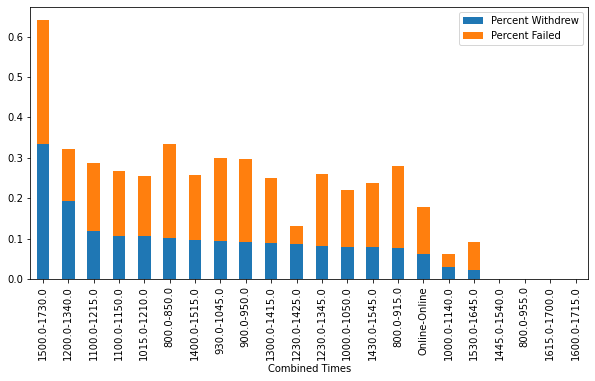

In [109]:
# this graph shows the split of DFW by each withdrew and fail rate
class_times.sort_values('Percent Withdrew',ascending=False).plot.bar(x='Combined Times',y=['Percent Withdrew','Percent Failed'],figsize=(10,5),stacked=True)

Finding which days of the week students tend to struggle with the most

In [110]:
student_classes.head()

,EncryptId,Subject,Course,Section,Term,Course_Hours_Attempted,Mid_Term_Grade,Final_Grade,Meeting_Days,Start_Time,End_Time
0,4124661,CSCI,2341,1,201110,3,NaN,C,MWF,1000.0,1050.0
1,4124661,CSCI,3331,1,201110,3,NaN,C,TR,930.0,1045.0
3,185083,CSCI,1302,1,201110,3,NaN,W6,MWF,800.0,850.0
4,23547594,CSCI,3342,1,201110,3,NaN,B,MWF,1000.0,1050.0
5,23547594,CSCI,4325,1,201110,3,NaN,B,TR,800.0,915.0


In [111]:
class_days = student_classes[['Meeting_Days']]
class_days['Meeting_Days'].unique()

array(['MWF', 'TR', 'MW', 'Online', 'MTWR', 'T', 'F'], dtype=object)

In [112]:
# getting unique meeting day combinations
class_days.drop_duplicates(inplace=True)
class_days

C:\Users\logan\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Meeting_Days
0,MWF
1,TR
53,MW
519,Online
520,MTWR
2926,T
3099,F


In [113]:
class_days.reset_index(inplace=True)
class_days.drop(columns = ['index'],inplace=True)
class_days

C:\Users\logan\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Meeting_Days
0,MWF
1,TR
2,MW
3,Online
4,MTWR
5,T
6,F


In [114]:
class_days['Percent Withdrew'] = ""
class_days['Percent Failed'] = ""
class_days['DFW Rates'] = ""
class_days.head()

C:\Users\logan\AppData\Local\Temp/ipykernel_23464/982285441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_days['Percent Withdrew'] = ""
C:\Users\logan\AppData\Local\Temp/ipykernel_23464/982285441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_days['Percent Failed'] = ""
C:\Users\logan\AppData\Local\Temp/ipykernel_23464/982285441.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,Meeting_Days,Percent Withdrew,Percent Failed,DFW Rates
0,MWF,,,
1,TR,,,
2,MW,,,
3,Online,,,
4,MTWR,,,


In [115]:
# finding which combination of days students withdraw from more often
for row in range(len(class_days)):
    Days = class_days['Meeting_Days'].iloc[[row]].values[0]
    tempWithdrew = withdrew_student_classes[(withdrew_student_classes['Meeting_Days'] == Days)]
    tempClasses = student_classes[(student_classes['Meeting_Days'] == Days)]
    class_days['Percent Withdrew'].iloc[[row]] = "{0:.4f}".format(len(tempWithdrew)/len(tempClasses))

C:\Users\logan\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [116]:
class_days

,Meeting_Days,Percent Withdrew,Percent Failed,DFW Rates
0,MWF,0.0918,,
1,TR,0.0866,,
2,MW,0.0937,,
3,Online,0.0608,,
4,MTWR,0.1028,,
5,T,0.0000,,
6,F,0.3250,,


In [117]:
#finding which meeting day combinations students fail more often
for row in range(len(class_days)):
    Days = class_days['Meeting_Days'].iloc[[row]].values[0]
    tempFailed = failed_student_classes[(failed_student_classes['Meeting_Days'] == Days)]
    tempClasses = student_classes[(student_classes['Meeting_Days'] == Days)]
    class_days['Percent Failed'].iloc[[row]] = "{0:.4f}".format(len(tempFailed)/len(tempClasses))

C:\Users\logan\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [118]:
class_days['Percent Withdrew'] = class_days['Percent Withdrew'].astype(float)
class_days['Percent Failed'] = class_days['Percent Failed'].astype(float)
class_days

C:\Users\logan\AppData\Local\Temp/ipykernel_23464/1857961548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_days['Percent Withdrew'] = class_days['Percent Withdrew'].astype(float)
C:\Users\logan\AppData\Local\Temp/ipykernel_23464/1857961548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_days['Percent Failed'] = class_days['Percent Failed'].astype(float)


,Meeting_Days,Percent Withdrew,Percent Failed,DFW Rates
0,MWF,0.0918,0.1765,
1,TR,0.0866,0.1707,
2,MW,0.0937,0.1617,
3,Online,0.0608,0.1163,
4,MTWR,0.1028,0.1206,
5,T,0.0000,0.0000,
6,F,0.3250,0.3000,


In [119]:
class_days['DFW Rates'] = class_days['Percent Withdrew'] + class_days['Percent Failed']
class_days

C:\Users\logan\AppData\Local\Temp/ipykernel_23464/3224606542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_days['DFW Rates'] = class_days['Percent Withdrew'] + class_days['Percent Failed']


,Meeting_Days,Percent Withdrew,Percent Failed,DFW Rates
0,MWF,0.0918,0.1765,0.2683
1,TR,0.0866,0.1707,0.2573
2,MW,0.0937,0.1617,0.2554
3,Online,0.0608,0.1163,0.1771
4,MTWR,0.1028,0.1206,0.2234
5,T,0.0000,0.0000,0.0000
6,F,0.3250,0.3000,0.6250


In [120]:
# creating this to make up for uneven dataset sizes, Friday classes had 40 datapoints, while MWF had thousands
class_days['log(Percent Withdrew)'] = np.log10(100*class_days['Percent Withdrew'])
class_days

C:\Users\logan\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\logan\AppData\Local\Temp/ipykernel_23464/635102964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_days['log(Percent Withdrew)'] = np.log10(100*class_days['Percent Withdrew'])


,Meeting_Days,Percent Withdrew,Percent Failed,DFW Rates,log(Percent Withdrew)
0,MWF,0.0918,0.1765,0.2683,0.962843
1,TR,0.0866,0.1707,0.2573,0.937518
2,MW,0.0937,0.1617,0.2554,0.971740
3,Online,0.0608,0.1163,0.1771,0.783904
4,MTWR,0.1028,0.1206,0.2234,1.011993
5,T,0.0000,0.0000,0.0000,-inf
6,F,0.3250,0.3000,0.6250,1.511883


<AxesSubplot:xlabel='Meeting_Days'>

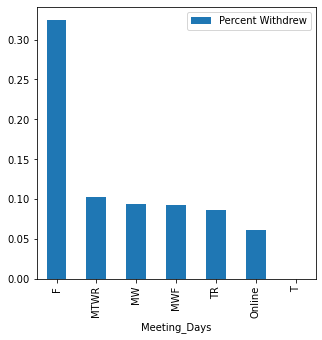

In [121]:
# huge skewedness to Friday classes because of lacking data
class_days.sort_values('Percent Withdrew',ascending=False).plot.bar(x='Meeting_Days',y='Percent Withdrew',figsize=(5,5))

<AxesSubplot:xlabel='Meeting_Days'>

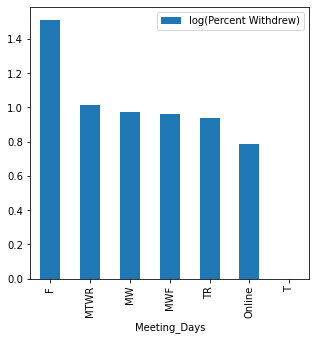

In [122]:
# plotting the log transformation to combat that, still heavily skewed to friday, fridays are bad days
class_days.sort_values('log(Percent Withdrew)',ascending=False).plot.bar(x='Meeting_Days',y='log(Percent Withdrew)',figsize=(5,5))

In [123]:
class_days['log(Percent Failed)'] = np.log10(100*class_days['Percent Failed'])
class_days

C:\Users\logan\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\logan\AppData\Local\Temp/ipykernel_23464/2377584291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_days['log(Percent Failed)'] = np.log10(100*class_days['Percent Failed'])


,Meeting_Days,Percent Withdrew,Percent Failed,DFW Rates,log(Percent Withdrew),log(Percent Failed)
0,MWF,0.0918,0.1765,0.2683,0.962843,1.246745
1,TR,0.0866,0.1707,0.2573,0.937518,1.232234
2,MW,0.0937,0.1617,0.2554,0.971740,1.208710
3,Online,0.0608,0.1163,0.1771,0.783904,1.065580
4,MTWR,0.1028,0.1206,0.2234,1.011993,1.081347
5,T,0.0000,0.0000,0.0000,-inf,-inf
6,F,0.3250,0.3000,0.6250,1.511883,1.477121


<AxesSubplot:xlabel='Meeting_Days'>

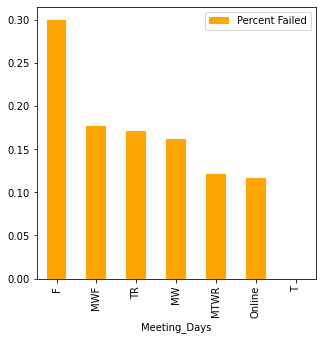

In [124]:
class_days.sort_values('Percent Failed',ascending=False).plot.bar(x='Meeting_Days',y='Percent Failed',figsize=(5,5),color='orange')

<AxesSubplot:xlabel='Meeting_Days'>

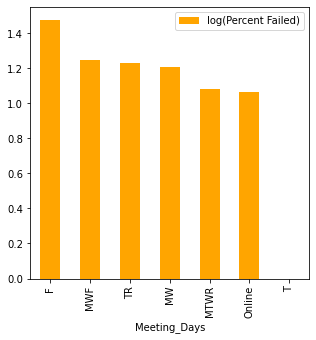

In [125]:
class_days.sort_values('log(Percent Failed)',ascending=False).plot.bar(x='Meeting_Days',y='log(Percent Failed)',figsize=(5,5),color='orange')

See the same skewedness for Friday classes in fail percentage, did the same transformation and is still skewed.

In [126]:
student_classes[student_classes['Meeting_Days'] == 'F'].shape

(40, 11)

In [127]:
student_classes[student_classes['Meeting_Days'] == 'MWF'].shape

(2147, 11)

<AxesSubplot:xlabel='Meeting_Days'>

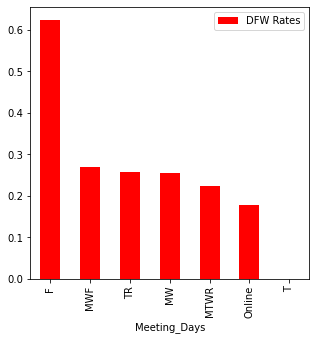

In [128]:
#DFW plot behaves the same way as previous graphs by definition
class_days.sort_values('DFW Rates',ascending=False).plot.bar(x='Meeting_Days',y='DFW Rates',figsize=(5,5),color='red')

In [130]:
#Finding the problem classes, classes with highest DFW rates, use this for more indepth analysis
#the course>1000 is to get rid of that pesky 343 course, felt like the easiest way to do that
ProbCourses=courses[(courses['DFW Rates']>.25)]['Course']

In [131]:
#restricting whole data set to just those problem courses
ProblemClasses=student_classes[(student_classes['Course']).isin(ProbCourses)]

In [132]:
ProblemClasses['Course'].unique()

array(['2341', '1302', '3342', '2314', '3353', '2302', '2311', '3333',
       '2301', '3302'], dtype=object)

In [133]:
ProblemClasses

,EncryptId,Subject,Course,Section,Term,Course_Hours_Attempted,Mid_Term_Grade,Final_Grade,Meeting_Days,Start_Time,End_Time
0,4124661,CSCI,2341,1,201110,3,NaN,C,MWF,1000.0,1050.0
3,185083,CSCI,1302,1,201110,3,NaN,W6,MWF,800.0,850.0
4,23547594,CSCI,3342,1,201110,3,NaN,B,MWF,1000.0,1050.0
7,19539773,CSCI,2314,1,201110,3,NaN,F,MWF,900.0,950.0
8,19539773,CSCI,2341,1,201110,3,NaN,F,MWF,1000.0,1050.0
...,...,...,...,...,...,...,...,...,...,...,...
10321,25964076,CSCI,1302,1,202130,3,B,B,MTWR,1200.0,1340.0
10322,25964076,CSCI,2302,1,202130,3,A,B,MTWR,1000.0,1140.0
10323,25964076,CSCI,2311,1,202130,3,NaN,W6,MTWR,1200.0,1340.0
10324,5874241,CSCI,1302,1,202130,3,C,C,MTWR,1200.0,1340.0


In [134]:
# filling that missing data for these three with online like before, just making sure they are still there
ProblemClasses[['Meeting_Days','Start_Time','End_Time']] = ProblemClasses[['Meeting_Days','Start_Time','End_Time']].fillna('Online')
ProblemClasses.shape

C:\Users\logan\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(5377, 11)

In [135]:
student_classes.shape

(10268, 11)

classes that have a 25% or higher DFW percentage make up for 52.37% of all the total number of computer science courses taken by computer science majors

In [136]:
# of these problem classes, these are the ones eventually withdrew from
ProblemClasses_Withdrew = ProblemClasses[(student_classes['Final_Grade'] == 'W6') | (ProblemClasses['Final_Grade'] == 'W') | (ProblemClasses['Final_Grade'] == 'WP') | (ProblemClasses['Final_Grade'] == 'WF') | (ProblemClasses['Final_Grade'] == 'QF')]

C:\Users\logan\AppData\Local\Temp/ipykernel_23464/4063140013.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ProblemClasses_Withdrew = ProblemClasses[(student_classes['Final_Grade'] == 'W6') | (ProblemClasses['Final_Grade'] == 'W') | (ProblemClasses['Final_Grade'] == 'WP') | (ProblemClasses['Final_Grade'] == 'WF') | (ProblemClasses['Final_Grade'] == 'QF')]


In [137]:
ProblemClasses_Withdrew

,EncryptId,Subject,Course,Section,Term,Course_Hours_Attempted,Mid_Term_Grade,Final_Grade,Meeting_Days,Start_Time,End_Time
3,185083,CSCI,1302,1,201110,3,NaN,W6,MWF,800.0,850.0
63,18455061,CSCI,2341,1,201110,3,NaN,QF,MWF,1000.0,1050.0
70,1673719,CSIT,3353,1,201110,3,NaN,QF,TR,1100.0,1215.0
89,10555777,CSCI,1302,1,201110,3,NaN,QF,MWF,800.0,850.0
116,15077596,CSCI,1302,7,201110,3,NaN,W6,TR,1100.0,1215.0
...,...,...,...,...,...,...,...,...,...,...,...
10291,24178202,CSCI,2311,1,202130,3,F,W6,MTWR,1200.0,1340.0
10294,462814,CSCI,2311,1,202130,3,D,W6,MTWR,1200.0,1340.0
10297,8496352,CSCI,1302,1,202130,3,NaN,W6,MTWR,1200.0,1340.0
10309,9340643,CSCI,2302,1,202130,3,F,W6,MTWR,1000.0,1140.0


In [138]:
# of these problem classes, these are the ones failed
ProblemClasses_Failed = ProblemClasses[(student_classes['Final_Grade'] == 'F') | (student_classes['Final_Grade'] == 'D')]

C:\Users\logan\AppData\Local\Temp/ipykernel_23464/1342556409.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ProblemClasses_Failed = ProblemClasses[(student_classes['Final_Grade'] == 'F') | (student_classes['Final_Grade'] == 'D')]


In [139]:
ProblemClasses_Failed

,EncryptId,Subject,Course,Section,Term,Course_Hours_Attempted,Mid_Term_Grade,Final_Grade,Meeting_Days,Start_Time,End_Time
7,19539773,CSCI,2314,1,201110,3,NaN,F,MWF,900.0,950.0
8,19539773,CSCI,2341,1,201110,3,NaN,F,MWF,1000.0,1050.0
24,8867568,CSCI,2341,1,201110,3,NaN,F,MWF,1000.0,1050.0
39,27317938,CSCI,1302,6,201110,3,NaN,F,TR,930.0,1045.0
53,2905001,CSCI,2302,1,201110,3,NaN,F,MW,1430.0,1545.0
...,...,...,...,...,...,...,...,...,...,...,...
10261,25250561,CSCI,2302,1,202130,3,F,F,MTWR,1000.0,1140.0
10283,8971581,CSCI,2311,1,202130,3,F,F,MTWR,1200.0,1340.0
10292,24119478,CSCI,2311,1,202130,3,F,F,MTWR,1200.0,1340.0
10303,19350935,CSCI,2311,1,202130,3,A,D,MTWR,1200.0,1340.0


In [140]:
# getting the days from these courses to get the unique
ProblemClasses_Days = ProblemClasses[['Subject','Course','Meeting_Days']]
ProblemClasses_Days

,Subject,Course,Meeting_Days
0,CSCI,2341,MWF
3,CSCI,1302,MWF
4,CSCI,3342,MWF
7,CSCI,2314,MWF
8,CSCI,2341,MWF
...,...,...,...
10321,CSCI,1302,MTWR
10322,CSCI,2302,MTWR
10323,CSCI,2311,MTWR
10324,CSCI,1302,MTWR


In [141]:
# getting only the unique days for each course
ProblemClasses_Days.drop_duplicates(inplace=True)
ProblemClasses_Days.sort_values(by=['Subject','Course'],inplace=True)
ProblemClasses_Days

C:\Users\logan\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Subject,Course,Meeting_Days
3,CSCI,1302,MWF
29,CSCI,1302,TR
520,CSCI,1302,MTWR
1759,CSCI,1302,MW
9174,CSCI,1302,Online
53,CSCI,2302,MW
280,CSCI,2302,TR
521,CSCI,2302,MTWR
1279,CSCI,2302,MWF
9207,CSCI,2302,Online


In [142]:
ProblemClasses_Days['Percent Withdrew'] = ""
ProblemClasses_Days['Percent Failed'] = ""

C:\Users\logan\AppData\Local\Temp/ipykernel_23464/668285379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ProblemClasses_Days['Percent Withdrew'] = ""
C:\Users\logan\AppData\Local\Temp/ipykernel_23464/668285379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ProblemClasses_Days['Percent Failed'] = ""


In [144]:
# for each class, which days do students withdraw from most often
for row in range(len(ProblemClasses_Days)):
    Days = ProblemClasses_Days['Meeting_Days'].iloc[[row]].values[0]
    Subject = ProblemClasses_Days['Subject'].iloc[[row]].values[0]
    Course = ProblemClasses_Days['Course'].iloc[[row]].values[0]
    tempWithdrew = ProblemClasses_Withdrew[(ProblemClasses_Withdrew['Meeting_Days'] == Days) & (ProblemClasses_Withdrew['Subject'] == Subject) & (ProblemClasses_Withdrew['Course'] == Course)]
    tempClasses = ProblemClasses[(ProblemClasses['Meeting_Days'] == Days) & (ProblemClasses['Subject'] == Subject) & (ProblemClasses['Course'] == Course)]
    ProblemClasses_Days['Percent Withdrew'].iloc[[row]] = "{0:.4f}".format(len(tempWithdrew)/len(tempClasses))

C:\Users\logan\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [145]:
ProblemClasses_Days

,Subject,Course,Meeting_Days,Percent Withdrew,Percent Failed
3,CSCI,1302,MWF,0.1113,
29,CSCI,1302,TR,0.1277,
520,CSCI,1302,MTWR,0.0676,
1759,CSCI,1302,MW,0.1357,
9174,CSCI,1302,Online,0.0909,
53,CSCI,2302,MW,0.1849,
280,CSCI,2302,TR,0.1796,
521,CSCI,2302,MTWR,0.1600,
1279,CSCI,2302,MWF,0.1659,
9207,CSCI,2302,Online,0.0000,


In [146]:
# for each class, which days do students fail more often
for row in range(len(ProblemClasses_Days)):
    Days = ProblemClasses_Days['Meeting_Days'].iloc[[row]].values[0]
    Subject = ProblemClasses_Days['Subject'].iloc[[row]].values[0]
    Course = ProblemClasses_Days['Course'].iloc[[row]].values[0]
    tempFailed = ProblemClasses_Failed[(ProblemClasses_Failed['Meeting_Days'] == Days) & (ProblemClasses_Failed['Subject'] == Subject) & (ProblemClasses_Failed['Course'] == Course)]
    tempClasses = ProblemClasses[(ProblemClasses['Meeting_Days'] == Days) & (ProblemClasses['Subject'] == Subject) & (ProblemClasses['Course'] == Course)]
    ProblemClasses_Days['Percent Failed'].iloc[[row]] = "{0:.4f}".format(len(tempFailed)/len(tempClasses))

C:\Users\logan\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [147]:
ProblemClasses_Days['Percent Withdrew'] = ProblemClasses_Days['Percent Withdrew'].astype(float)
ProblemClasses_Days['Percent Failed'] = ProblemClasses_Days['Percent Failed'].astype(float)
ProblemClasses_Days

C:\Users\logan\AppData\Local\Temp/ipykernel_23464/1772249125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ProblemClasses_Days['Percent Withdrew'] = ProblemClasses_Days['Percent Withdrew'].astype(float)
C:\Users\logan\AppData\Local\Temp/ipykernel_23464/1772249125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ProblemClasses_Days['Percent Failed'] = ProblemClasses_Days['Percent Failed'].astype(float)


,Subject,Course,Meeting_Days,Percent Withdrew,Percent Failed
3,CSCI,1302,MWF,0.1113,0.2439
29,CSCI,1302,TR,0.1277,0.2788
520,CSCI,1302,MTWR,0.0676,0.0811
1759,CSCI,1302,MW,0.1357,0.1857
9174,CSCI,1302,Online,0.0909,0.1818
53,CSCI,2302,MW,0.1849,0.2437
280,CSCI,2302,TR,0.1796,0.2044
521,CSCI,2302,MTWR,0.1600,0.1500
1279,CSCI,2302,MWF,0.1659,0.2140
9207,CSCI,2302,Online,0.0000,0.0000


In [148]:
# combining results from above into DFW rates
ProblemClasses_Days['DFW Rates'] = ProblemClasses_Days['Percent Failed'] + ProblemClasses_Days['Percent Withdrew']
ProblemClasses_Days.head()

C:\Users\logan\AppData\Local\Temp/ipykernel_23464/1117881553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ProblemClasses_Days['DFW Rates'] = ProblemClasses_Days['Percent Failed'] + ProblemClasses_Days['Percent Withdrew']


,Subject,Course,Meeting_Days,Percent Withdrew,Percent Failed,DFW Rates
3,CSCI,1302,MWF,0.1113,0.2439,0.3552
29,CSCI,1302,TR,0.1277,0.2788,0.4065
520,CSCI,1302,MTWR,0.0676,0.0811,0.1487
1759,CSCI,1302,MW,0.1357,0.1857,0.3214
9174,CSCI,1302,Online,0.0909,0.1818,0.2727


In [149]:
# creating this column for graphing purposes
ProblemClasses_Days['Subject and Course'] = ProblemClasses_Days['Subject'] + " " + ProblemClasses_Days['Course'].astype(str)
ProblemClasses_Days

C:\Users\logan\AppData\Local\Temp/ipykernel_23464/3287790455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ProblemClasses_Days['Subject and Course'] = ProblemClasses_Days['Subject'] + " " + ProblemClasses_Days['Course'].astype(str)


,Subject,Course,Meeting_Days,Percent Withdrew,Percent Failed,DFW Rates,Subject and Course
3,CSCI,1302,MWF,0.1113,0.2439,0.3552,CSCI 1302
29,CSCI,1302,TR,0.1277,0.2788,0.4065,CSCI 1302
520,CSCI,1302,MTWR,0.0676,0.0811,0.1487,CSCI 1302
1759,CSCI,1302,MW,0.1357,0.1857,0.3214,CSCI 1302
9174,CSCI,1302,Online,0.0909,0.1818,0.2727,CSCI 1302
53,CSCI,2302,MW,0.1849,0.2437,0.4286,CSCI 2302
280,CSCI,2302,TR,0.1796,0.2044,0.3840,CSCI 2302
521,CSCI,2302,MTWR,0.1600,0.1500,0.3100,CSCI 2302
1279,CSCI,2302,MWF,0.1659,0.2140,0.3799,CSCI 2302
9207,CSCI,2302,Online,0.0000,0.0000,0.0000,CSCI 2302


In [150]:
# pivot table for withdrew percentage
# this pivot table becomes a heatmap for better visualization below
ProblemClasses_Days.pivot(index=['Subject and Course'],columns='Meeting_Days',values=['Percent Withdrew'])

Percent Withdrew                                        
Meeting_Days                      F    MTWR      MW     MWF  Online      TR
Subject and Course                                                         
CSCI 1302                       NaN  0.0676  0.1357  0.1113  0.0909  0.1277
CSCI 2302                       NaN  0.1600  0.1849  0.1659  0.0000  0.1796
CSCI 2311                       NaN  0.1923  0.1045  0.0654  0.0000  0.1123
CSCI 2314                    0.3333     NaN  0.1211  0.2430     NaN  0.1284
CSCI 2341                       NaN     NaN  0.1772  0.2143     NaN  0.2315
CSCI 3302                       NaN     NaN  0.2308  0.0526     NaN  0.1463
CSCI 3333                       NaN     NaN  0.0435  0.0615     NaN  0.1077
CSCI 3342                       NaN     NaN  0.0500  0.0600  0.0000  0.0840
CSIT 2301                       NaN  0.0204  0.1111  0.1875  0.0952  0.1333
CSIT 3353                       NaN     NaN  0.0286     NaN     NaN  0.0513

<AxesSubplot:xlabel='Meeting_Days', ylabel='Subject and Course'>

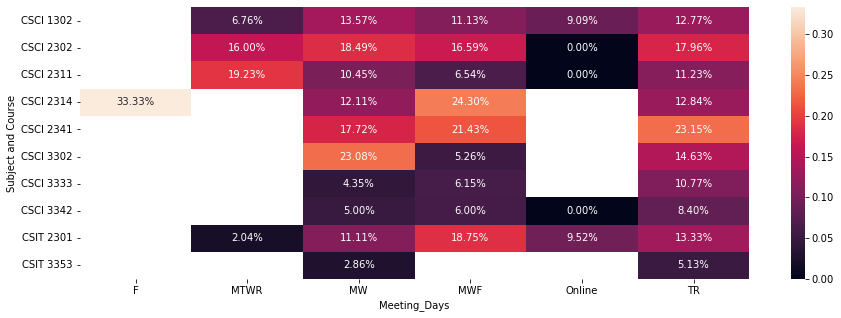

In [151]:
plt.figure(figsize=(15,5))
sns.heatmap(ProblemClasses_Days.pivot('Subject and Course','Meeting_Days','Percent Withdrew'),annot=True,fmt='.2%')

Architecture (CSCI 2314) has double drop out percentage in 50 min classes vs 1hr15 

Data Structures has much higher drop out percentage in 1hr15 min vs 50

CSIT 2301 does much better in 50 min vs 1hr15min

In [152]:
# doing same as above for fail percentage
# becomes heatmap below for easier visualization
ProblemClasses_Days.pivot(index=['Subject and Course'],columns='Meeting_Days',values=['Percent Failed'])

Percent Failed                                        
Meeting_Days                    F    MTWR      MW     MWF  Online      TR
Subject and Course                                                       
CSCI 1302                     NaN  0.0811  0.1857  0.2439  0.1818  0.2788
CSCI 2302                     NaN  0.1500  0.2437  0.2140  0.0000  0.2044
CSCI 2311                     NaN  0.1923  0.2000  0.2150  0.2727  0.2449
CSCI 2314                  0.3077     NaN  0.2211  0.2991     NaN  0.1351
CSCI 2341                     NaN     NaN  0.2532  0.2619     NaN  0.2886
CSCI 3302                     NaN     NaN  0.2308  0.2632     NaN  0.1341
CSCI 3333                     NaN     NaN  0.2609  0.1385     NaN  0.1692
CSCI 3342                     NaN     NaN  0.2000  0.1600  0.2500  0.2017
CSIT 2301                     NaN  0.1429  0.2323  0.3594  0.0952  0.3778
CSIT 3353                     NaN     NaN  0.1429     NaN     NaN  0.2198

<AxesSubplot:xlabel='Meeting_Days', ylabel='Subject and Course'>

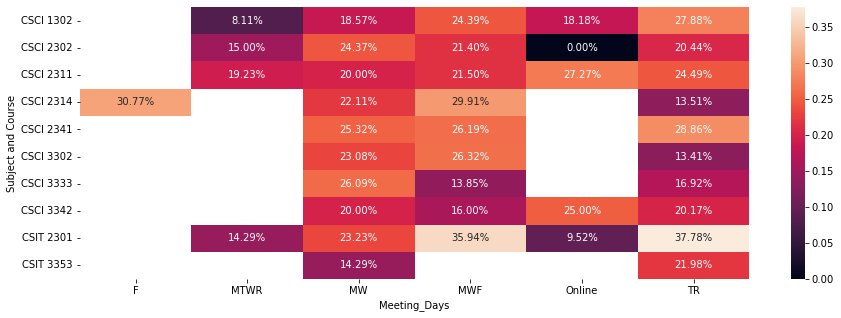

In [153]:
plt.figure(figsize=(15,5))
sns.heatmap(ProblemClasses_Days.pivot('Subject and Course','Meeting_Days','Percent Failed'),annot=True,fmt='.2%')

All of the same discoveries from previously hold similarly here

In [154]:
# this is the important one 
# doing the same for DFW rates, what we really care about
ProblemClasses_Days.pivot(index=['Subject and Course'],columns='Meeting_Days',values=['DFW Rates'])

DFW Rates                                        
Meeting_Days               F    MTWR      MW     MWF  Online      TR
Subject and Course                                                  
CSCI 1302                NaN  0.1487  0.3214  0.3552  0.2727  0.4065
CSCI 2302                NaN  0.3100  0.4286  0.3799  0.0000  0.3840
CSCI 2311                NaN  0.3846  0.3045  0.2804  0.2727  0.3572
CSCI 2314              0.641     NaN  0.3422  0.5421     NaN  0.2635
CSCI 2341                NaN     NaN  0.4304  0.4762     NaN  0.5201
CSCI 3302                NaN     NaN  0.4616  0.3158     NaN  0.2804
CSCI 3333                NaN     NaN  0.3044  0.2000     NaN  0.2769
CSCI 3342                NaN     NaN  0.2500  0.2200  0.2500  0.2857
CSIT 2301                NaN  0.1633  0.3434  0.5469  0.1904  0.5111
CSIT 3353                NaN     NaN  0.1715     NaN     NaN  0.2711

<AxesSubplot:xlabel='Meeting_Days', ylabel='Subject and Course'>

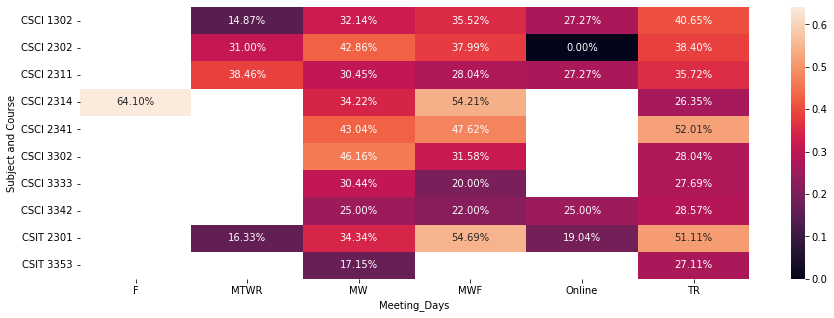

In [155]:
plt.figure(figsize=(15,5))
sns.heatmap(ProblemClasses_Days.pivot('Subject and Course','Meeting_Days','DFW Rates'),annot=True,fmt='.2%')

By definition, the same results from previously hold true

----------------------------------------------------------------------------------------------------------------------------

Analysis of the different times for each of the top problem classes the same way as the days

In [156]:
# seperating times
ProblemClasses_Times = ProblemClasses[['Subject','Course','Start_Time','End_Time']]
ProblemClasses_Times

,Subject,Course,Start_Time,End_Time
0,CSCI,2341,1000.0,1050.0
3,CSCI,1302,800.0,850.0
4,CSCI,3342,1000.0,1050.0
7,CSCI,2314,900.0,950.0
8,CSCI,2341,1000.0,1050.0
...,...,...,...,...
10321,CSCI,1302,1200.0,1340.0
10322,CSCI,2302,1000.0,1140.0
10323,CSCI,2311,1200.0,1340.0
10324,CSCI,1302,1200.0,1340.0


In [157]:
# getting unique time slots for each course
ProblemClasses_Times.drop_duplicates(inplace=True)
ProblemClasses_Times.sort_values(by=['Subject','Course'],inplace=True)
ProblemClasses_Times

C:\Users\logan\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Subject,Course,Start_Time,End_Time
3,CSCI,1302,800.0,850.0
9,CSCI,1302,900.0,950.0
29,CSCI,1302,800.0,915.0
39,CSCI,1302,930.0,1045.0
116,CSCI,1302,1100.0,1215.0
...,...,...,...,...
10253,CSIT,2301,1000.0,1140.0
22,CSIT,3353,1100.0,1215.0
579,CSIT,3353,1400.0,1515.0
1276,CSIT,3353,930.0,1045.0


In [158]:
ProblemClasses_Times['Percent Withdrew'] = ""
ProblemClasses_Times['Percent Failed'] = ""
ProblemClasses_Times['DFW Rates'] = ""

C:\Users\logan\AppData\Local\Temp/ipykernel_23464/1248449467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ProblemClasses_Times['Percent Withdrew'] = ""
C:\Users\logan\AppData\Local\Temp/ipykernel_23464/1248449467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ProblemClasses_Times['Percent Failed'] = ""
C:\Users\logan\AppData\Local\Temp/ipykernel_23464/1248449467.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [159]:
# for each class, which time slot students withdraw from more often
for row in range(len(ProblemClasses_Times)):
    StartTime = ProblemClasses_Times['Start_Time'].iloc[[row]].values[0]
    EndTime = ProblemClasses_Times['End_Time'].iloc[[row]].values[0]
    Subject = ProblemClasses_Times['Subject'].iloc[[row]].values[0]
    Course = ProblemClasses_Times['Course'].iloc[[row]].values[0]
    tempWithdrew = ProblemClasses_Withdrew[(ProblemClasses_Withdrew['Start_Time'] == StartTime) & (ProblemClasses_Withdrew['End_Time'] == EndTime) & (ProblemClasses_Withdrew['Subject'] == Subject) & (ProblemClasses_Withdrew['Course'] == Course)]
    tempClasses = ProblemClasses[(ProblemClasses['Start_Time'] == StartTime) & (ProblemClasses['End_Time'] == EndTime) & (ProblemClasses['Subject'] == Subject) & (ProblemClasses['Course'] == Course)]
    ProblemClasses_Times['Percent Withdrew'].iloc[[row]] = "{0:.4f}".format(len(tempWithdrew)/len(tempClasses))

C:\Users\logan\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [160]:
ProblemClasses_Times

,Subject,Course,Start_Time,End_Time,Percent Withdrew,Percent Failed,DFW Rates
3,CSCI,1302,800.0,850.0,0.1364,,
9,CSCI,1302,900.0,950.0,0.0842,,
29,CSCI,1302,800.0,915.0,0.1414,,
39,CSCI,1302,930.0,1045.0,0.1818,,
116,CSCI,1302,1100.0,1215.0,0.1385,,
...,...,...,...,...,...,...,...
10253,CSIT,2301,1000.0,1140.0,0.0000,,
22,CSIT,3353,1100.0,1215.0,0.0714,,
579,CSIT,3353,1400.0,1515.0,0.0423,,
1276,CSIT,3353,930.0,1045.0,0.0500,,


In [161]:
# for each class, which time slots students fail from more often
for row in range(len(ProblemClasses_Times)):
    StartTime = ProblemClasses_Times['Start_Time'].iloc[[row]].values[0]
    EndTime = ProblemClasses_Times['End_Time'].iloc[[row]].values[0]
    Subject = ProblemClasses_Times['Subject'].iloc[[row]].values[0]
    Course = ProblemClasses_Times['Course'].iloc[[row]].values[0]
    tempFailed = ProblemClasses_Failed[(ProblemClasses_Failed['Start_Time'] == StartTime) & (ProblemClasses_Failed['End_Time'] == EndTime) & (ProblemClasses_Failed['Subject'] == Subject) & (ProblemClasses_Failed['Course'] == Course)]
    tempClasses = ProblemClasses[(ProblemClasses['Start_Time'] == StartTime) & (ProblemClasses['End_Time'] == EndTime) & (ProblemClasses['Subject'] == Subject) & (ProblemClasses['Course'] == Course)]
    ProblemClasses_Times['Percent Failed'].iloc[[row]] = "{0:.4f}".format(len(tempFailed)/len(tempClasses))

C:\Users\logan\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [162]:
ProblemClasses_Times['Percent Withdrew'] = ProblemClasses_Times['Percent Withdrew'].astype(float)
ProblemClasses_Times['Percent Failed'] = ProblemClasses_Times['Percent Failed'].astype(float)

C:\Users\logan\AppData\Local\Temp/ipykernel_23464/3524038325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ProblemClasses_Times['Percent Withdrew'] = ProblemClasses_Times['Percent Withdrew'].astype(float)
C:\Users\logan\AppData\Local\Temp/ipykernel_23464/3524038325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ProblemClasses_Times['Percent Failed'] = ProblemClasses_Times['Percent Failed'].astype(float)


In [163]:
ProblemClasses_Times['DFW Rates'] = ProblemClasses_Times['Percent Failed'] + ProblemClasses_Times['Percent Withdrew']
ProblemClasses_Times.head()

C:\Users\logan\AppData\Local\Temp/ipykernel_23464/3117152581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ProblemClasses_Times['DFW Rates'] = ProblemClasses_Times['Percent Failed'] + ProblemClasses_Times['Percent Withdrew']


,Subject,Course,Start_Time,End_Time,Percent Withdrew,Percent Failed,DFW Rates
3,CSCI,1302,800.0,850.0,0.1364,0.2818,0.4182
9,CSCI,1302,900.0,950.0,0.0842,0.2624,0.3466
29,CSCI,1302,800.0,915.0,0.1414,0.3030,0.4444
39,CSCI,1302,930.0,1045.0,0.1818,0.4000,0.5818
116,CSCI,1302,1100.0,1215.0,0.1385,0.2513,0.3898


In [164]:
# creating these columns for graphing purposes
ProblemClasses_Times['Subject and Course'] = ProblemClasses_Times['Subject'] + " " + ProblemClasses_Times['Course'].astype(str)
ProblemClasses_Times['Time Slot'] = ProblemClasses_Times['Start_Time'].astype(str) + "-" + ProblemClasses_Times['End_Time'].astype(str)
ProblemClasses_Times

C:\Users\logan\AppData\Local\Temp/ipykernel_23464/3196599539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ProblemClasses_Times['Subject and Course'] = ProblemClasses_Times['Subject'] + " " + ProblemClasses_Times['Course'].astype(str)
C:\Users\logan\AppData\Local\Temp/ipykernel_23464/3196599539.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ProblemClasses_Times['Time Slot'] = ProblemClasses_Times['Start_Time'].astype(str) + "-" + ProblemClasses_Times['End_Time'].astype(str)


,Subject,Course,Start_Time,End_Time,Percent Withdrew,Percent Failed,DFW Rates,Subject and Course,Time Slot
3,CSCI,1302,800.0,850.0,0.1364,0.2818,0.4182,CSCI 1302,800.0-850.0
9,CSCI,1302,900.0,950.0,0.0842,0.2624,0.3466,CSCI 1302,900.0-950.0
29,CSCI,1302,800.0,915.0,0.1414,0.3030,0.4444,CSCI 1302,800.0-915.0
39,CSCI,1302,930.0,1045.0,0.1818,0.4000,0.5818,CSCI 1302,930.0-1045.0
116,CSCI,1302,1100.0,1215.0,0.1385,0.2513,0.3898,CSCI 1302,1100.0-1215.0
...,...,...,...,...,...,...,...,...,...
10253,CSIT,2301,1000.0,1140.0,0.0000,0.0000,0.0000,CSIT 2301,1000.0-1140.0
22,CSIT,3353,1100.0,1215.0,0.0714,0.2381,0.3095,CSIT 3353,1100.0-1215.0
579,CSIT,3353,1400.0,1515.0,0.0423,0.0563,0.0986,CSIT 3353,1400.0-1515.0
1276,CSIT,3353,930.0,1045.0,0.0500,0.2875,0.3375,CSIT 3353,930.0-1045.0


In [165]:
# pivot table for heatmap below
# DFW Rates for each time slot for each class
ProblemClasses_Times.pivot('Subject and Course','Time Slot','DFW Rates')

Time Slot,1000.0-1050.0,1000.0-1140.0,1015.0-1210.0,1100.0-1150.0,1100.0-1215.0,1200.0-1340.0,1230.0-1345.0,1230.0-1425.0,1300.0-1415.0,1400.0-1515.0,1430.0-1545.0,1500.0-1730.0,1530.0-1645.0,800.0-850.0,800.0-915.0,900.0-950.0,930.0-1045.0,Online-Online
Subject and Course,,,,,,,,,,,,,,,,,,
CSCI 1302,0.3220,NaN,0.1579,0.3607,0.3898,0.1176,0.3547,NaN,0.3934,0.3881,0.2658,NaN,NaN,0.4182,0.4444,0.3466,0.5818,0.2727
CSCI 2302,0.2641,0.1334,0.3412,0.3896,0.4011,NaN,0.2609,NaN,0.4156,0.5334,0.3282,NaN,NaN,NaN,0.3103,0.4343,0.6000,0.0000
CSCI 2311,0.2459,NaN,NaN,0.3044,0.0968,0.5714,0.3687,0.1666,0.3777,0.1455,0.1689,NaN,NaN,NaN,NaN,0.3478,0.4247,0.2727
CSCI 2314,0.5758,NaN,NaN,NaN,0.2069,NaN,0.1470,NaN,0.0625,0.5926,0.3988,0.641,NaN,NaN,NaN,0.4878,NaN,NaN
CSCI 2341,0.4737,NaN,NaN,0.4782,0.5413,NaN,0.3334,NaN,0.4411,0.5526,0.3810,NaN,0.7368,NaN,0.3846,NaN,0.4842,NaN
CSCI 3302,NaN,NaN,NaN,NaN,0.2500,NaN,0.1905,NaN,0.4616,0.7000,NaN,NaN,NaN,NaN,NaN,0.3158,0.2307,NaN
CSCI 3333,0.0769,NaN,NaN,0.1818,0.4242,NaN,0.2979,NaN,NaN,0.0000,0.3044,NaN,NaN,NaN,0.2414,0.2667,0.0769,NaN
CSCI 3342,0.1053,NaN,NaN,NaN,0.2353,NaN,NaN,NaN,NaN,0.2666,0.2500,NaN,NaN,NaN,0.4348,0.2903,NaN,0.2500
CSIT 2301,0.4117,0.0000,0.2000,NaN,NaN,NaN,0.6538,NaN,0.3434,NaN,NaN,NaN,NaN,0.7058,NaN,0.5334,0.3158,0.1904


<AxesSubplot:xlabel='Time Slot', ylabel='Subject and Course'>

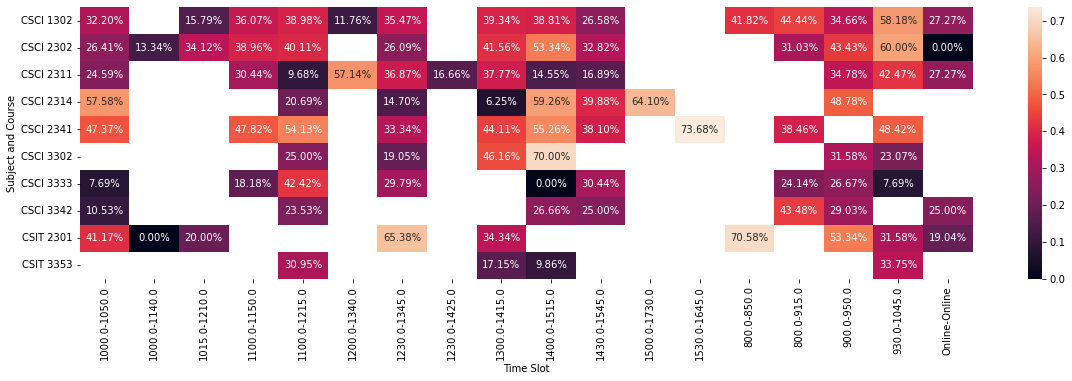

In [166]:
# this is the most important graph of this whole notebook
# most of the 65% plus percentages were covid year so we can ignore those since it is an anomoly
plt.figure(figsize=(20,5))
sns.heatmap(ProblemClasses_Times.pivot('Subject and Course','Time Slot','DFW Rates'),annot=True,fmt='.2%')

8-8:50/9:15 have high DFW Rates

9-9:50 has high rates, as well as 9:30-10:45

Some exceptions, but these were only offered in one semester a piece so not much can be gathered from those

The only exception to above, is discrete(3333) at 9:30 has 4 semesters offered and has a very low DFW rate